In [5]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [24]:
import scienceplots
plt.style.use(['science','ieee','high-vis'])
plt.rcParams['text.usetex'] = False

Poisson(μ=76): mean=72.00, std=8.49
Poisson(μ=84): mean=84.00, std=9.17

PDF arrays shape: (200,)
Sum of PDF_76: 1.000000
Sum of PDF_84: 1.000000


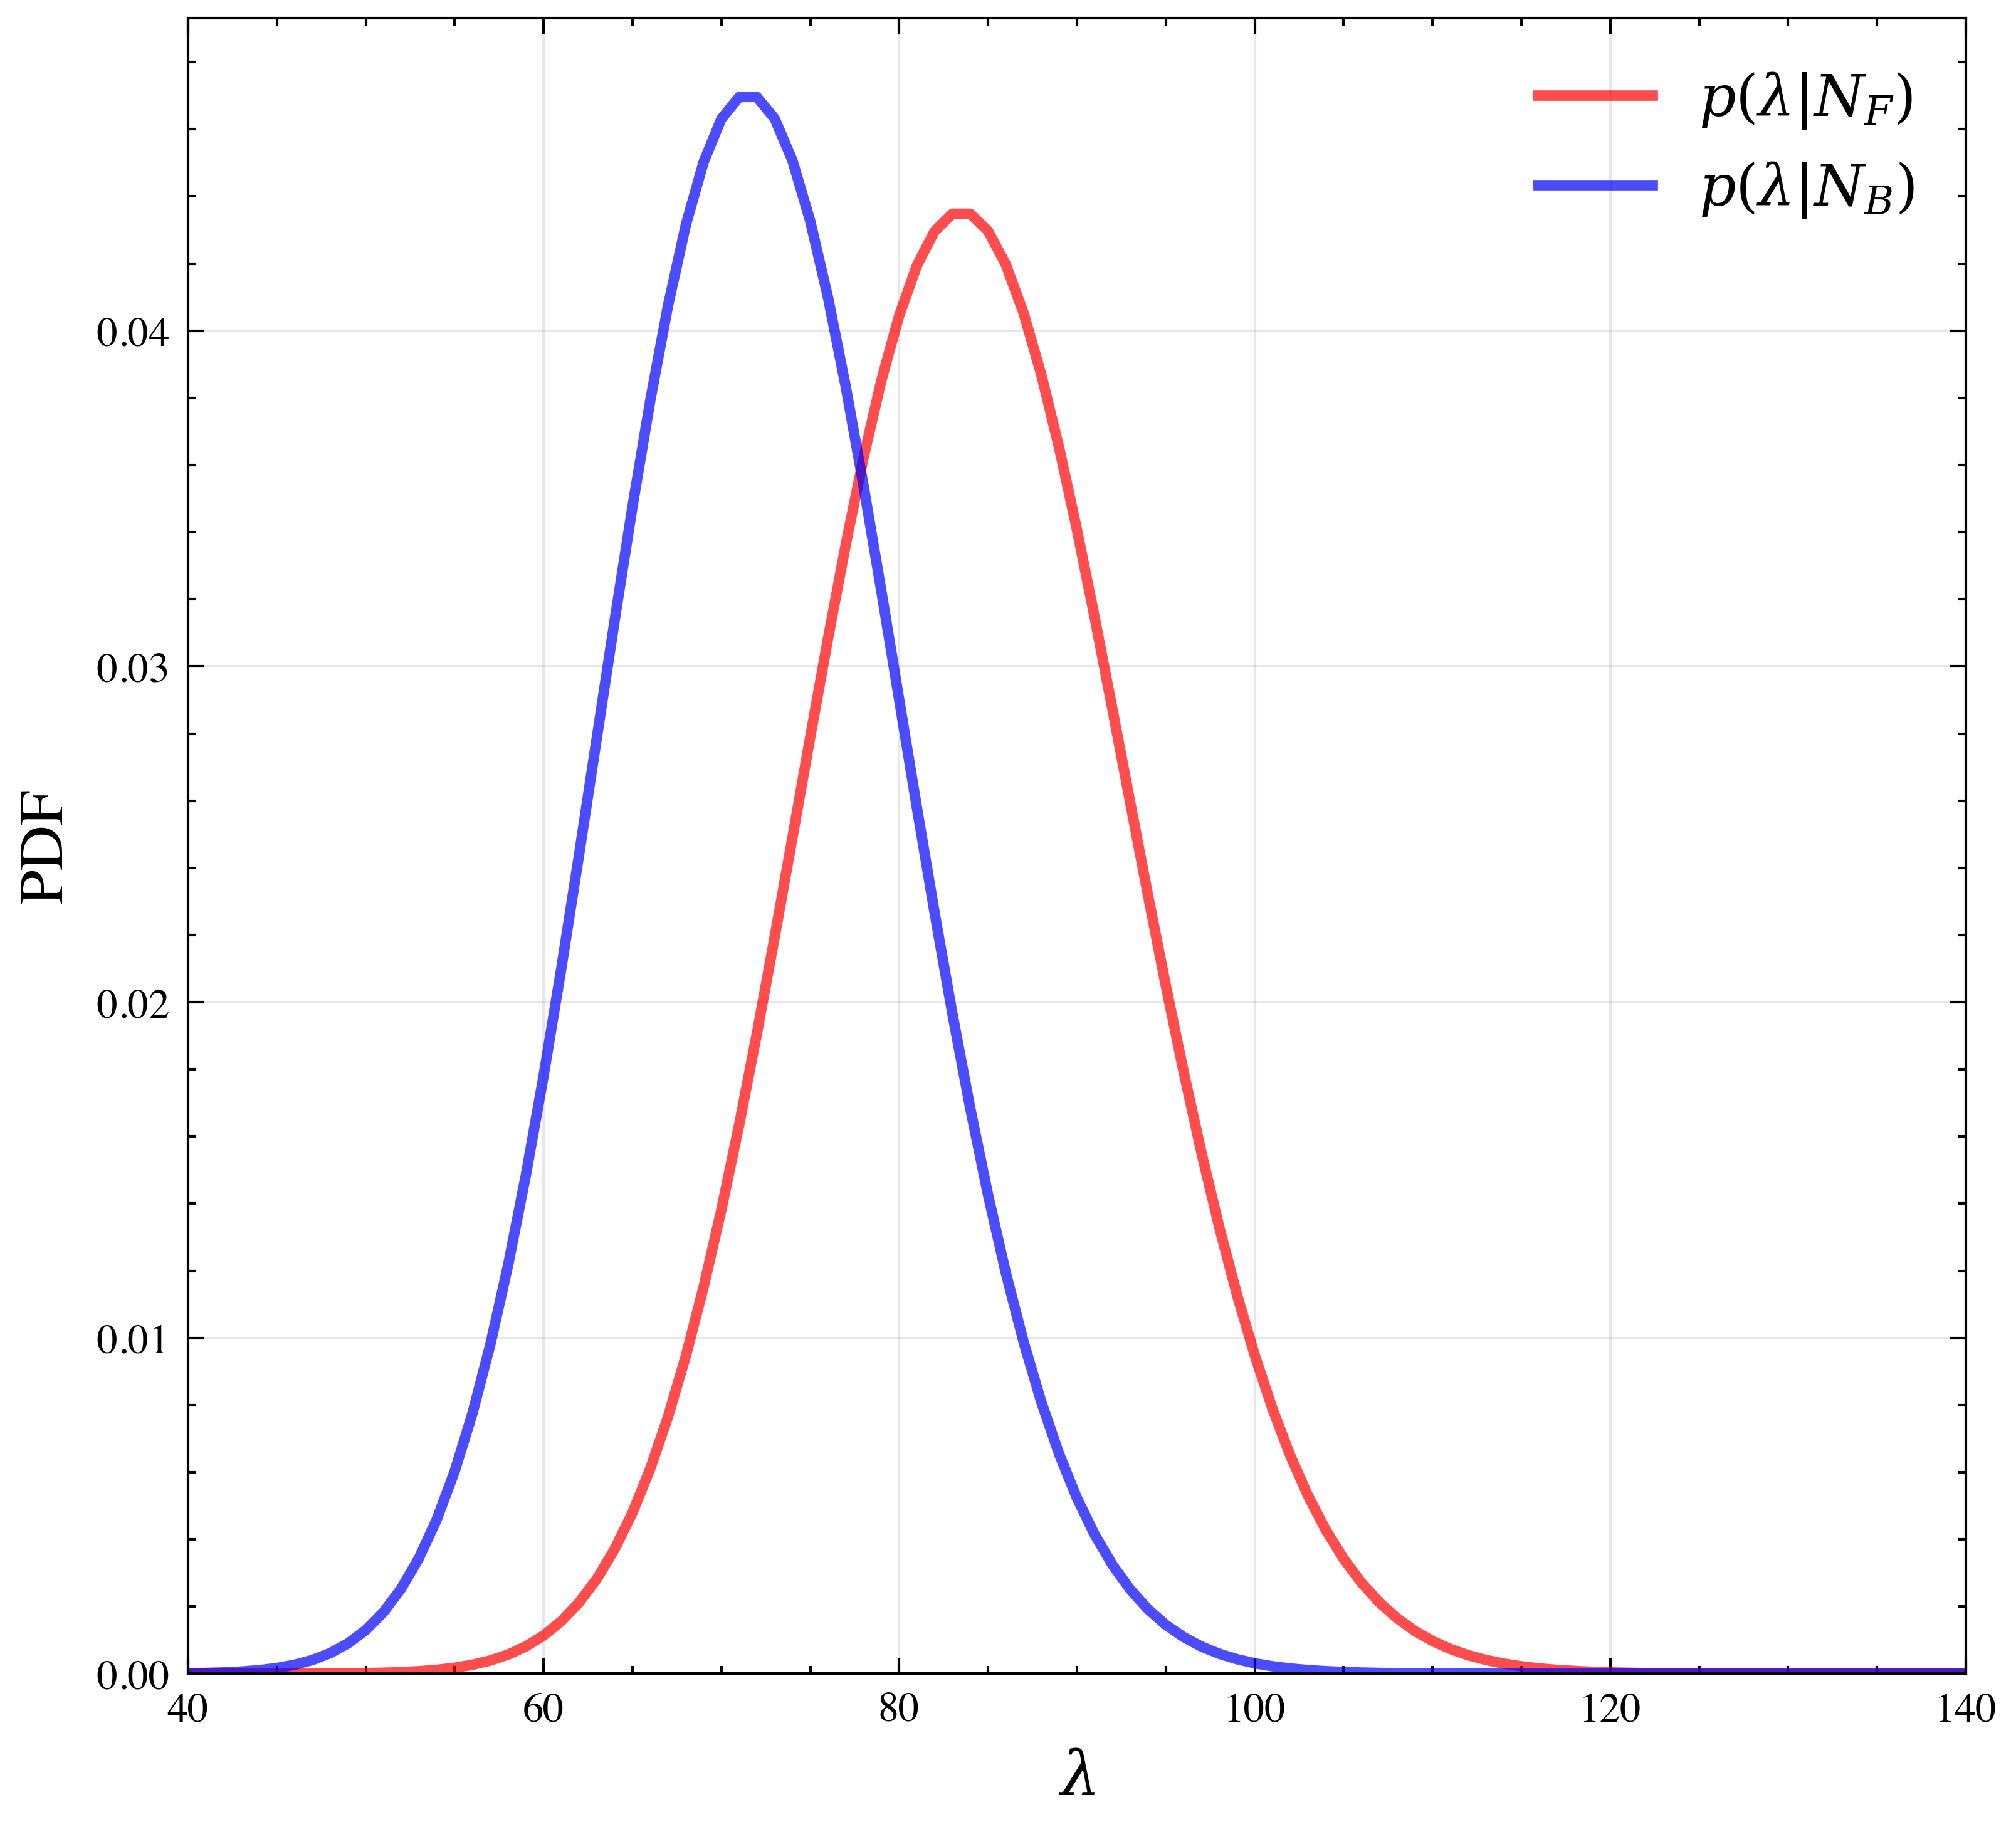

In [39]:
# Define Poisson distributions with means 76 and 84
poisson_76 = poisson(mu=72)
poisson_84 = poisson(mu=84)

# Create k array from 1 to 200
k_array = np.arange( 1, 201,1)

# Compute PDFs for both distributions
pdf_76 = poisson_76.pmf(k_array)
pdf_84 = poisson_84.pmf(k_array)

# Print some statistics
print(f"Poisson(μ=76): mean={poisson_76.mean():.2f}, std={poisson_76.std():.2f}")
print(f"Poisson(μ=84): mean={poisson_84.mean():.2f}, std={poisson_84.std():.2f}")
print(f"\nPDF arrays shape: {pdf_76.shape}")
print(f"Sum of PDF_76: {pdf_76.sum():.6f}")
print(f"Sum of PDF_84: {pdf_84.sum():.6f}")

# Plot the PDFs
plt.figure(figsize=(5.5, 5))

plt.plot(k_array, pdf_84, 'r-', label=r'$p(\lambda|N_F)$', linewidth=2, alpha=0.7)
plt.plot(k_array, pdf_76, 'b-', label=r'$p(\lambda|N_B)$', linewidth=2, alpha=0.7)

plt.xlabel(r'$\lambda$', fontsize=12)
plt.ylabel('PDF', fontsize=12)
# plt.title('Poisson Distribution PDFs', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(40, 140)
plt.ylim(0)
plt.tight_layout()
# plt.savefig('Poisson_distribution_pdfs.pdf',bbox_inches='tight')
plt.show()



In [40]:
np.arange(1,201,1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

BAYES FACTOR COMPUTATION FOR ISOTROPY TEST
Observed events - Forward hemisphere (N_F): 84
Observed events - Backward hemisphere (N_B): 72
Total events: 156

Prior: Uniform on λ ∈ [1, 201]

Evidence for H_I (isotropy): 1.007542e-04 ± 1.221357e-09
Evidence for H_A (anisotropy): 2.500000e-05 ± 1.398038e-13

Bayes Factor B^I_A = p(H_I|d) / p(H_A|d) = 4.030169

INTERPRETATION:
B^I_A = 4.03 > 1: Data favors ISOTROPY hypothesis (H_I)
Evidence is 4.03 times stronger for isotropy than anisotropy

Log Bayes Factor: log(B^I_A) = 1.3938


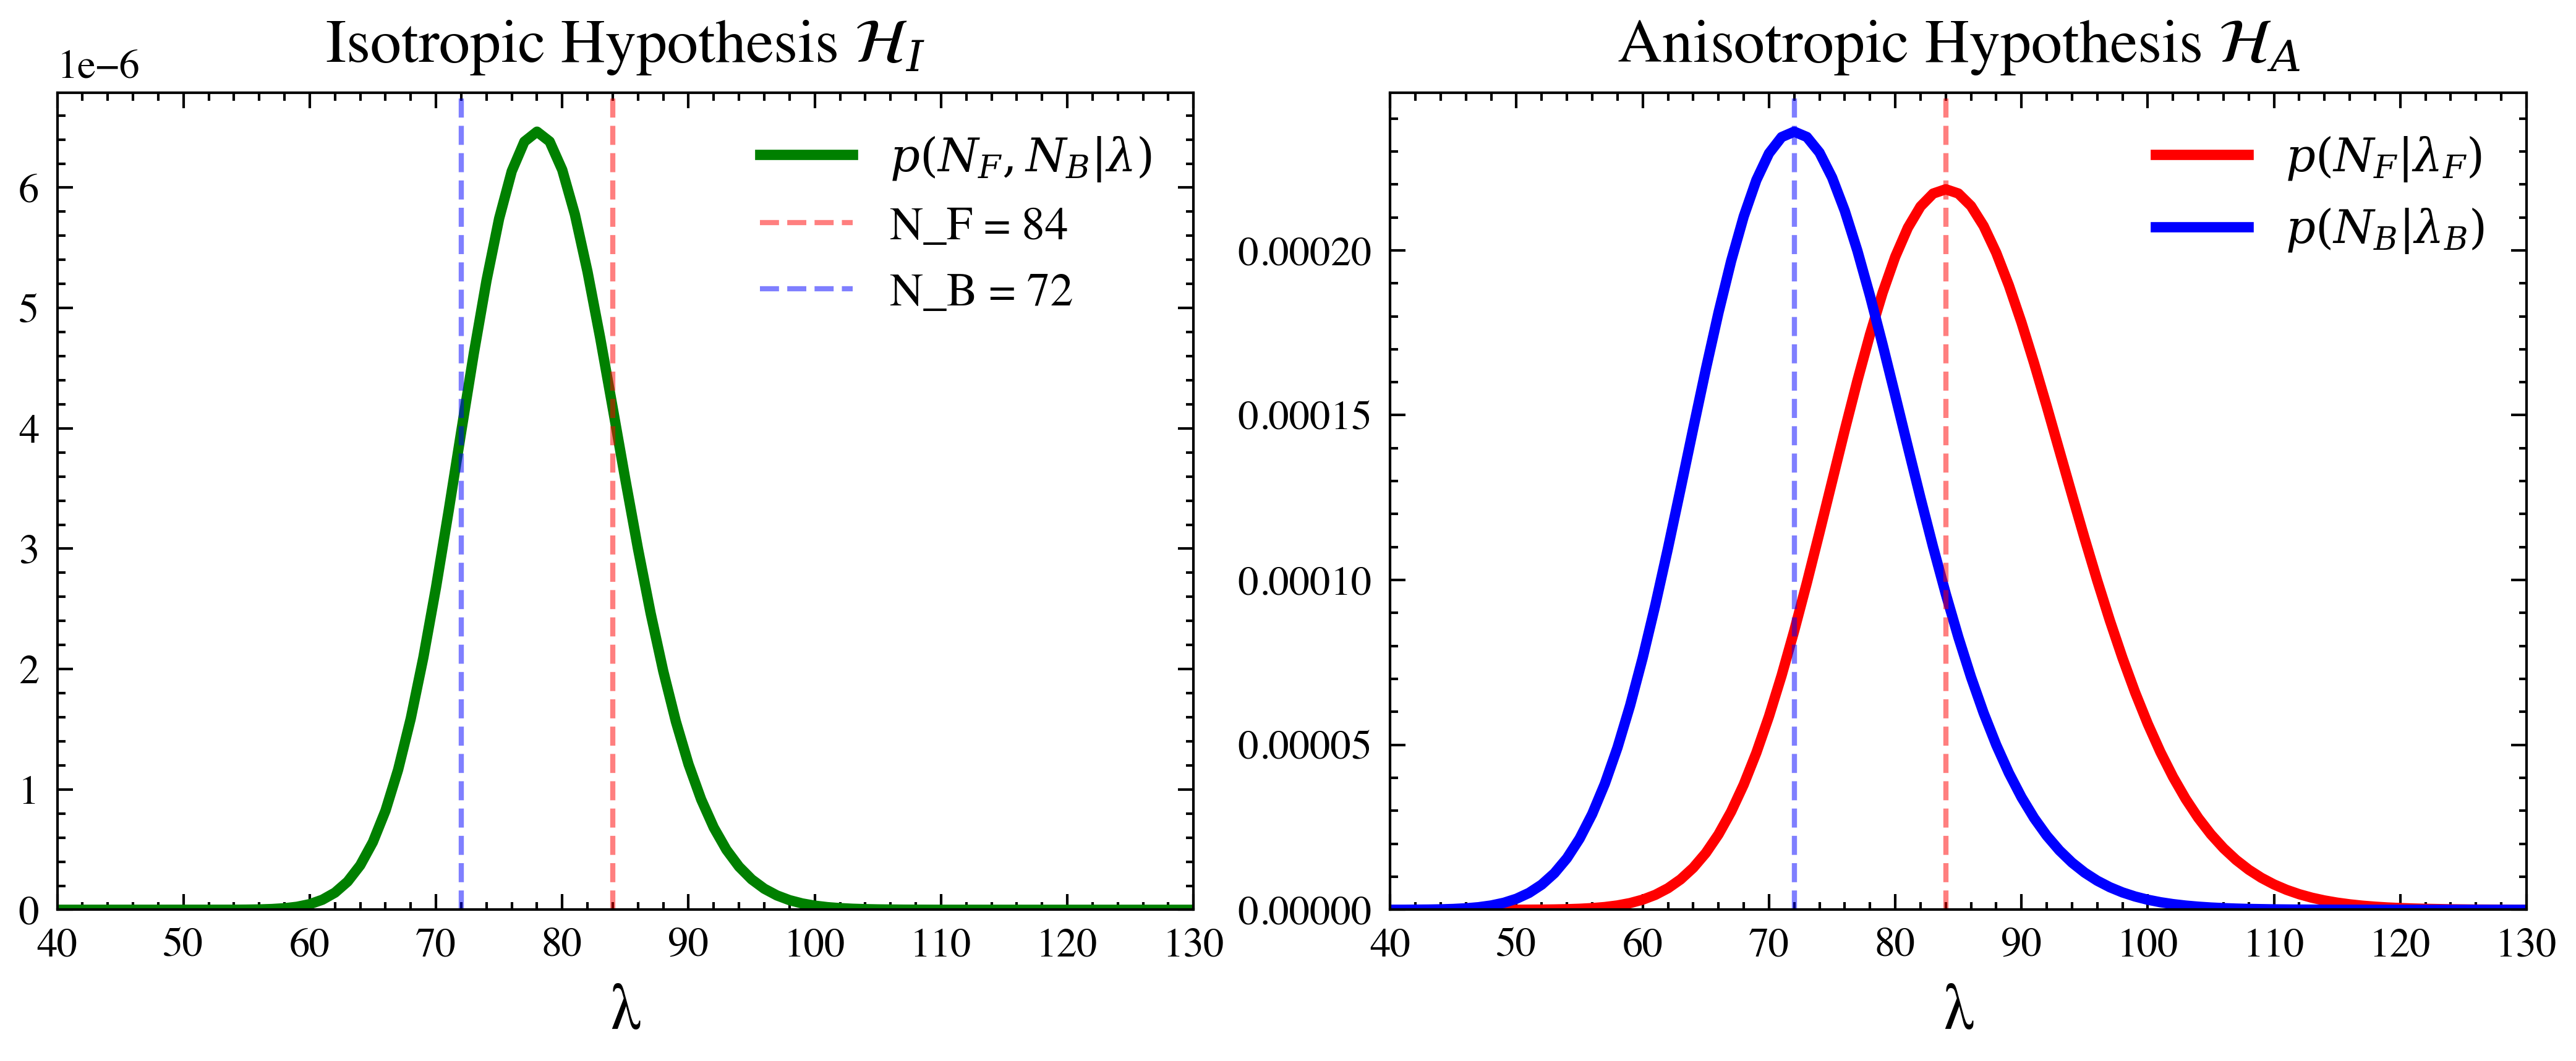

In [ ]:
def compute_bayes_factor_isotropy(N_F, N_B, lambda_min=1, lambda_max=201):
    """
    Compute Bayes factor for testing isotropy hypothesis.
    
    H_I (isotropy): Both hemispheres have same Poisson rate λ
    H_A (anisotropy): Each hemisphere has independent rates λ_F and λ_B
    
    Parameters:
    -----------
    N_F : int
        Number of events in Forward hemisphere
    N_B : int
        Number of events in Backward hemisphere
    lambda_min : float
        Lower bound of uniform prior (default: 1)
    lambda_max : float
        Upper bound of uniform prior (default: 100)
    
    Returns:
    --------
    B_IA : float
        Bayes factor B^I_A = p(H_I|d) / p(H_A|d)
    evidence_I : float
        Evidence for isotropic hypothesis
    evidence_A : float
        Evidence for anisotropic hypothesis
    """
    
    # Uniform prior normalization constant
    prior_norm = 1.0 / (lambda_max - lambda_min)
    
    # ===== NUMERATOR: Isotropic hypothesis H_I =====
    # p(H_I|d) = ∫ p(N_F, N_B | λ) π(λ) dλ
    # where p(N_F, N_B | λ) = Poisson(N_F | λ) × Poisson(N_B | λ)
    
    def likelihood_isotropic(lambda_val):
        """Likelihood for isotropic model: p(N_F, N_B | λ)"""
        if lambda_val <= 0:
            return 0.0
        # Poisson likelihood: λ^k * exp(-λ) / k!
        # For two independent Poisson: p(N_F, N_B | λ) = p(N_F | λ) × p(N_B | λ)
        log_likelihood = (N_F + N_B) * np.log(lambda_val) - 2 * lambda_val
        # Subtract log factorials (using Stirling approximation for large numbers if needed)
        log_factorial_F = np.sum(np.log(np.arange(1, N_F + 1))) if N_F > 0 else 0
        log_factorial_B = np.sum(np.log(np.arange(1, N_B + 1))) if N_B > 0 else 0
        return np.exp(log_likelihood - log_factorial_F - log_factorial_B)
    
    def integrand_I(lambda_val):
        """Integrand for isotropic evidence: p(N_F, N_B | λ) × π(λ)"""
        return likelihood_isotropic(lambda_val) * prior_norm
    
    evidence_I, error_I = quad(integrand_I, lambda_min, lambda_max)
    # lambda_array = np.arange(lambda_min, lambda_max, 1)
    # Integrand_I_arr = np.array([integrand_I(lambda_val) for lambda_val in lambda_array])
    # evidence_I_trapz = np.trapz(Integrand_I_arr, lambda_array)
    # print(f"Evidence_I_trapz: {evidence_I_trapz}")
    # print(f"Evidence_I: {evidence_I}")
    
    # ===== DENOMINATOR: Anisotropic hypothesis H_A =====
    # p(H_A|d) = ∫∫ p(N_F | λ_F) p(N_B | λ_B) π(λ_F) π(λ_B) dλ_F dλ_B
    
    def likelihood_anisotropic_F(lambda_F):
        """Likelihood for Forward hemisphere: p(N_F | λ_F)"""
        if lambda_F <= 0:
            return 0.0
        log_likelihood = N_F * np.log(lambda_F) - lambda_F
        log_factorial_F = np.sum(np.log(np.arange(1, N_F + 1))) if N_F > 0 else 0
        return np.exp(log_likelihood - log_factorial_F)
    
    def likelihood_anisotropic_B(lambda_B):
        """Likelihood for Backward hemisphere: p(N_B | λ_B)"""
        if lambda_B <= 0:
            return 0.0
        log_likelihood = N_B * np.log(lambda_B) - lambda_B
        log_factorial_B = np.sum(np.log(np.arange(1, N_B + 1))) if N_B > 0 else 0
        return np.exp(log_likelihood - log_factorial_B)
    
    # Since the integrals are separable, we can compute them separately
    def integrand_A_F(lambda_F):
        return likelihood_anisotropic_F(lambda_F) * prior_norm
    
    def integrand_A_B(lambda_B):
        return likelihood_anisotropic_B(lambda_B) * prior_norm
    
    evidence_A_F, error_A_F = quad(integrand_A_F, lambda_min, lambda_max)
    evidence_A_B, error_A_B = quad(integrand_A_B, lambda_min, lambda_max)

    
    
    # Evidence for anisotropic model is the product (since integrals are separable)
    evidence_A = evidence_A_F * evidence_A_B
    
    # Bayes factor
    B_IA = evidence_I / evidence_A if evidence_A > 0 else np.inf
    
    return B_IA, evidence_I, evidence_A, error_I, error_A_F, error_A_B

# Example: Using the means from the Poisson distributions as observed counts
# If we observed N_F = 84 and N_B = 76 events
N_F = 84
N_B = 72

print("=" * 80)
print("BAYES FACTOR COMPUTATION FOR ISOTROPY TEST")
print("=" * 80)
print(f"Observed events - Forward hemisphere (N_F): {N_F}")
print(f"Observed events - Backward hemisphere (N_B): {N_B}")
print(f"Total events: {N_F + N_B}")
print(f"\nPrior: Uniform on λ ∈ [1, 201]")
print("=" * 80)

B_IA, ev_I, ev_A, err_I, err_A_F, err_A_B = compute_bayes_factor_isotropy(N_F, N_B)

print(f"\nEvidence for H_I (isotropy): {ev_I:.6e} ± {err_I:.6e}")
print(f"Evidence for H_A (anisotropy): {ev_A:.6e} ± {err_A_F * ev_A:.6e}")
print(f"\nBayes Factor B^I_A = p(H_I|d) / p(H_A|d) = {B_IA:.6f}")

# Interpretation
print("\n" + "=" * 80)
print("INTERPRETATION:")
print("=" * 80)
if B_IA > 1:
    print(f"B^I_A = {B_IA:.2f} > 1: Data favors ISOTROPY hypothesis (H_I)")
    print(f"Evidence is {B_IA:.2f} times stronger for isotropy than anisotropy")
elif B_IA < 1:
    print(f"B^I_A = {B_IA:.2f} < 1: Data favors ANISOTROPY hypothesis (H_A)")
    print(f"Evidence is {1/B_IA:.2f} times stronger for anisotropy than isotropy")
else:
    print("B^I_A ≈ 1: Data is inconclusive")

# Compute log Bayes factor
log_B_IA = np.log(B_IA)
print(f"\nLog Bayes Factor: log(B^I_A) = {log_B_IA:.4f}")

# Plot the integrands as a function of lambda
lambda_range = np.arange(1, 201, 1)
lamba_max = lambda_range.max()
lambda_min = lambda_range.min()
# Compute integrands for plotting
integrand_I_vals = np.array([poisson(mu=lam).pmf(N_F) * poisson(mu=lam).pmf(N_B) 
                              for lam in lambda_range])

posterior_I_vals = integrand_I_vals /np.trapezoid(integrand_I_vals, lambda_range)

integrand_A_F_vals = np.array([poisson(mu=lam).pmf(N_F) for lam in lambda_range])
posterior_A_F_vals = integrand_A_F_vals /np.trapezoid(integrand_A_F_vals, lambda_range)

integrand_A_B_vals = np.array([poisson(mu=lam).pmf(N_B) for lam in lambda_range])
posterior_A_B_vals = integrand_A_B_vals /np.trapezoid(integrand_A_B_vals, lambda_range)

prior_norm = 1.0 / (lambda_range.max() - lambda_range.min())
integrand_I_vals *= prior_norm
integrand_A_F_vals *= prior_norm
integrand_A_B_vals *= prior_norm

plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
plt.plot(lambda_range, integrand_I_vals, 'g-', linewidth=2, 
         label=r'$p(N_F, N_B|\lambda)$')
plt.axvline(N_F, color='r', linestyle='--', alpha=0.5, label=f'N_F = {N_F}')
plt.axvline(N_B, color='b', linestyle='--', alpha=0.5, label=f'N_B = {N_B}')
plt.ylim(0)
plt.xlim(40,130)
plt.xlabel('λ', fontsize=12)
# plt.ylabel('Integrand', fontsize=12)
plt.title(r'Isotropic Hypothesis $\mathcal{H}_I$', fontsize=12)
plt.legend(fontsize=9)
# plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(lambda_range, integrand_A_F_vals, 'r-', linewidth=2, 
         label=r'$p(N_F|\lambda_F)$')
plt.plot(lambda_range, integrand_A_B_vals, 'b-', linewidth=2, 
         label=r'$p(N_B|\lambda_B)$')
plt.axvline(N_F, color='r', linestyle='--', alpha=0.5)
plt.axvline(N_B, color='b', linestyle='--', alpha=0.5)
plt.ylim(0)
plt.xlim(40,130)
plt.xlabel('λ', fontsize=12)
# plt.ylabel('Integrand', fontsize=12)
plt.title(r'Anisotropic Hypothesis $\mathcal{H}_A$', fontsize=12)
plt.legend(fontsize=9)
# plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


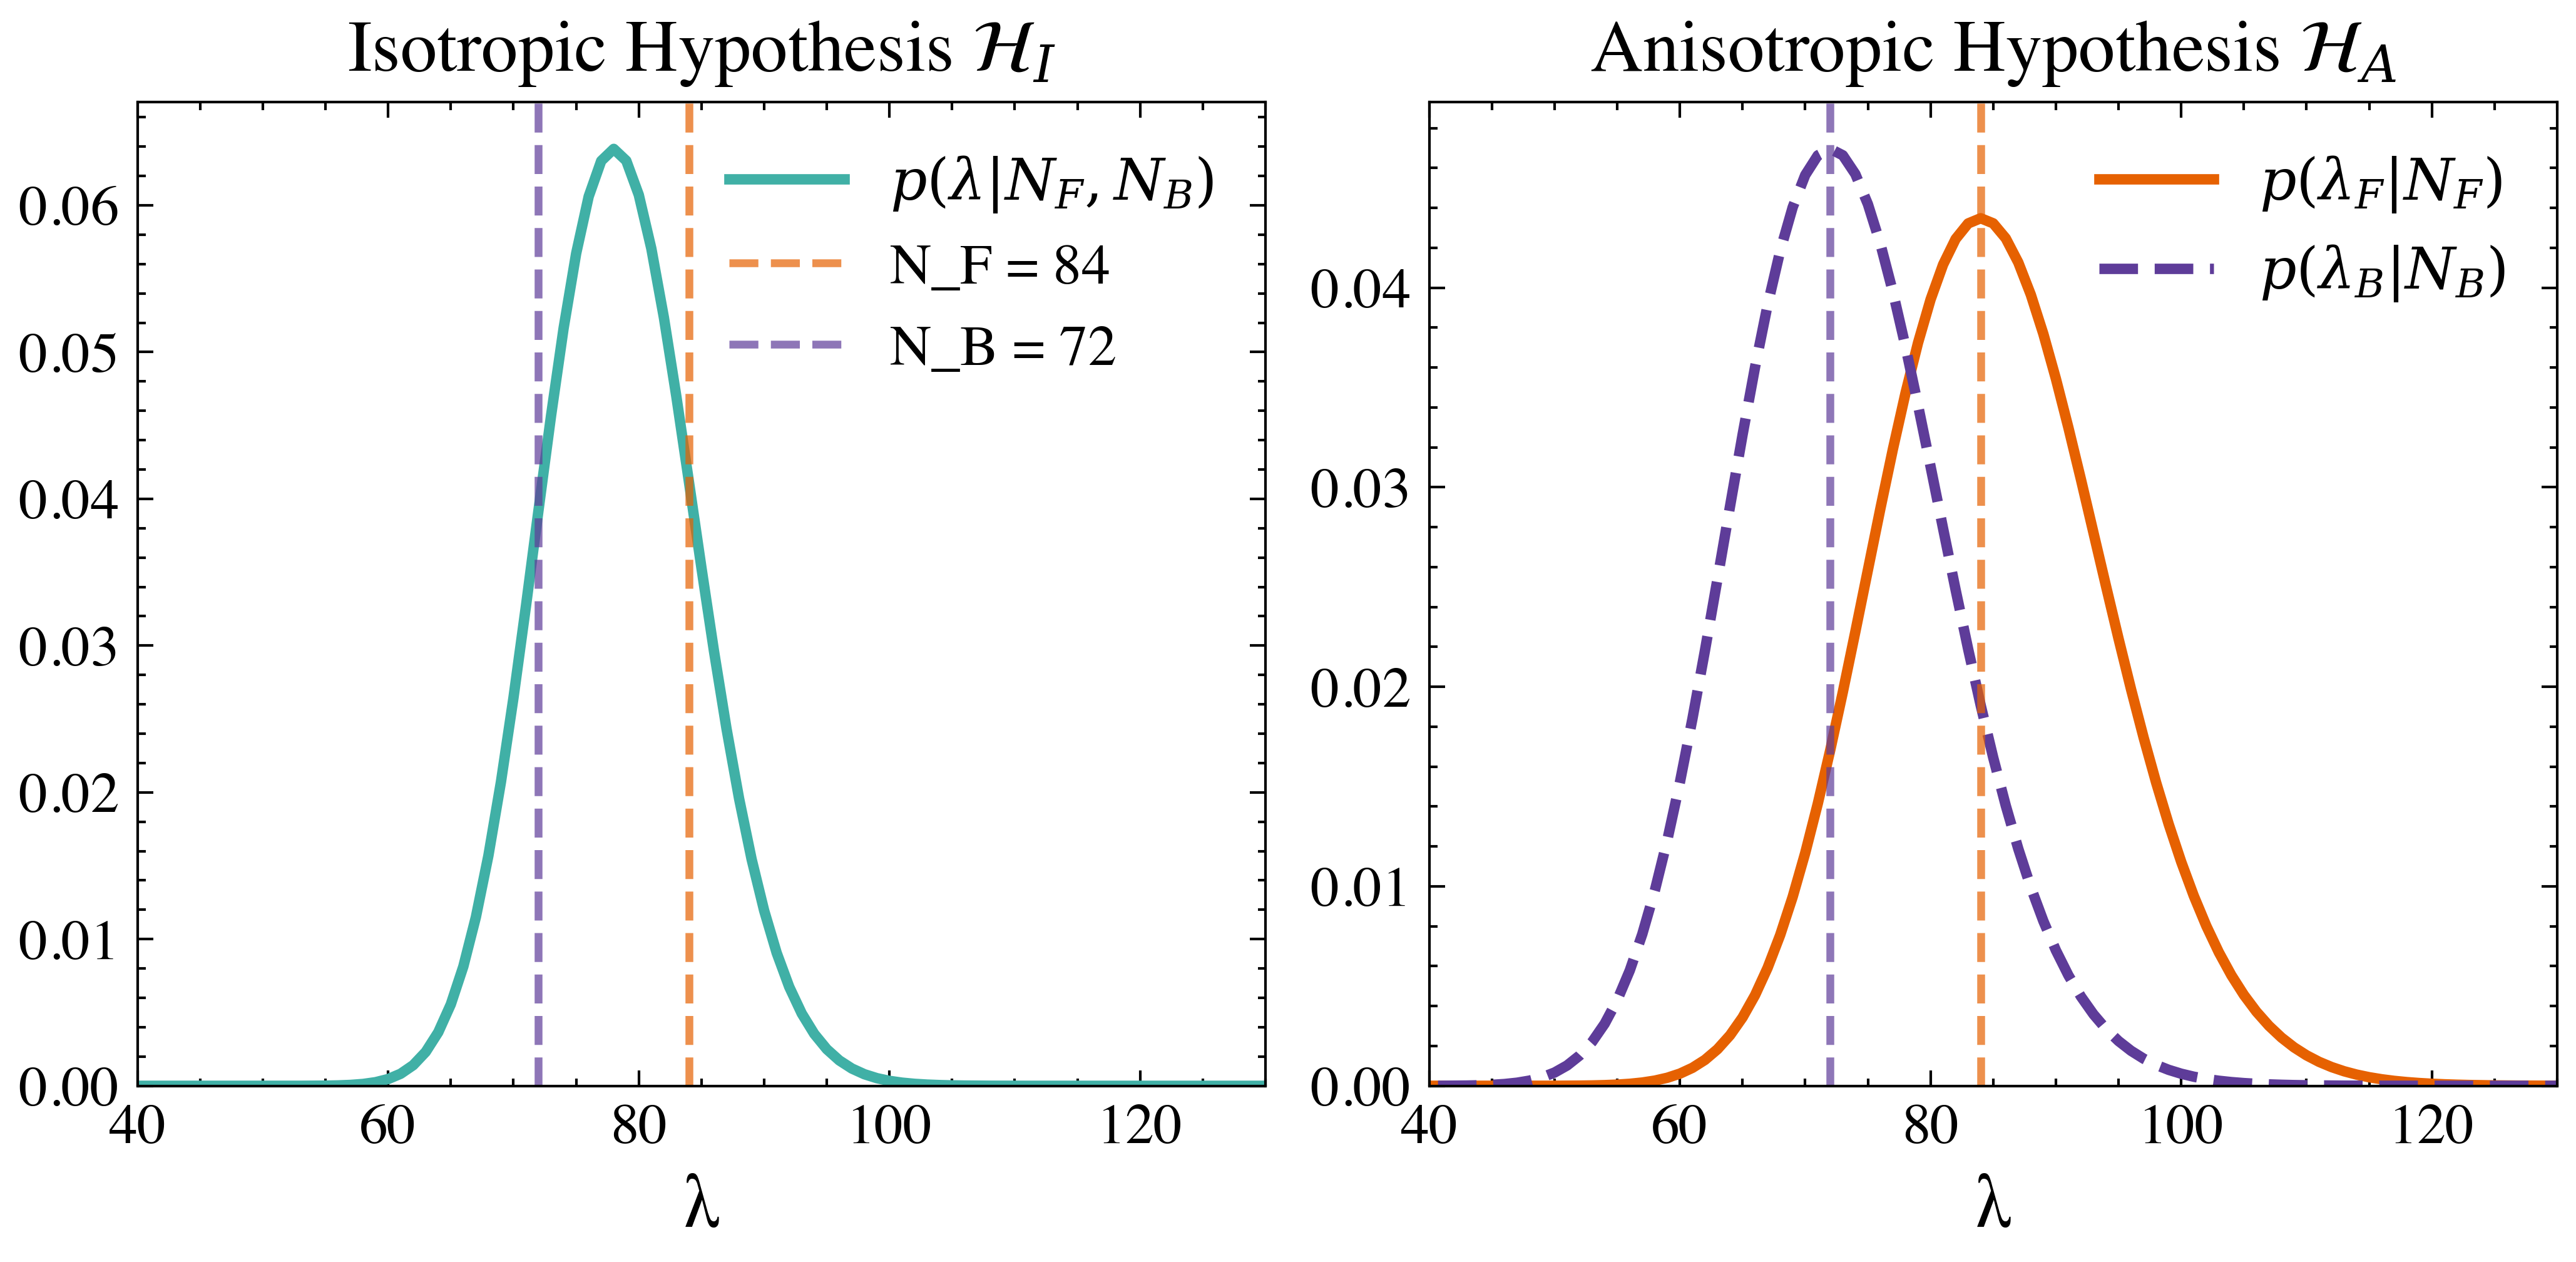

In [70]:
# Define a refined, publication-style, colorblind-friendly palette

# color_iso = '#1f77b4'   # blue for isotropic posterior
# color_F   = '#d62728'   # red for forward hemisphere
# color_B   = '#2ca02c'   # green for backward hemisphere

color_iso = '#40b0a6'   # teal for isotropic posterior
color_F   = '#e66101'   # warm orange for forward hemisphere
color_B   = '#5e3c99'   # deep violet for backward hemisphere

# color_iso = '#0072B2'   # deep blue for isotropic posterior
# color_F   = '#D55E00'   # vermillion for forward hemisphere
# color_B   = '#E69F00'   # golden yellow for backward hemisphere

plt.figure(figsize=(7, 3.5))

plt.subplot(1, 2, 1)
plt.plot(lambda_range, posterior_I_vals, color=color_iso, linewidth=2,
         label=r'$p(\lambda|N_F, N_B)$')
plt.axvline(N_F, color=color_F, linestyle='--', linewidth=1.5, alpha=0.7, label=f'N_F = {N_F}')
plt.axvline(N_B, color=color_B, linestyle='--', linewidth=1.5, alpha=0.7, label=f'N_B = {N_B}')
plt.ylim(0)
plt.xlim(40,130)
plt.xlabel('λ', fontsize=14)
# plt.ylabel('Integrand', fontsize=12)
plt.title(r'Isotropic Hypothesis $\mathcal{H}_I$', fontsize=14)
plt.tick_params(labelsize=11)
plt.legend(fontsize=11)

plt.subplot(1, 2, 2)
plt.plot(lambda_range, posterior_A_F_vals, color=color_F, linewidth=2,
         label=r'$p(\lambda_F|N_F)$')
plt.plot(lambda_range, posterior_A_B_vals, color=color_B, linewidth=2,
         label=r'$p(\lambda_B|N_B)$')
plt.axvline(N_F, color=color_F, linestyle='--', linewidth=1.5, alpha=0.7)
plt.axvline(N_B, color=color_B, linestyle='--', linewidth=1.5, alpha=0.7)
plt.ylim(0)
plt.xlim(40,130)
plt.xlabel('λ', fontsize=14)
# plt.ylabel('Integrand', fontsize=12)
plt.title(r'Anisotropic Hypothesis $\mathcal{H}_A$', fontsize=14)
plt.tick_params(labelsize=11)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()


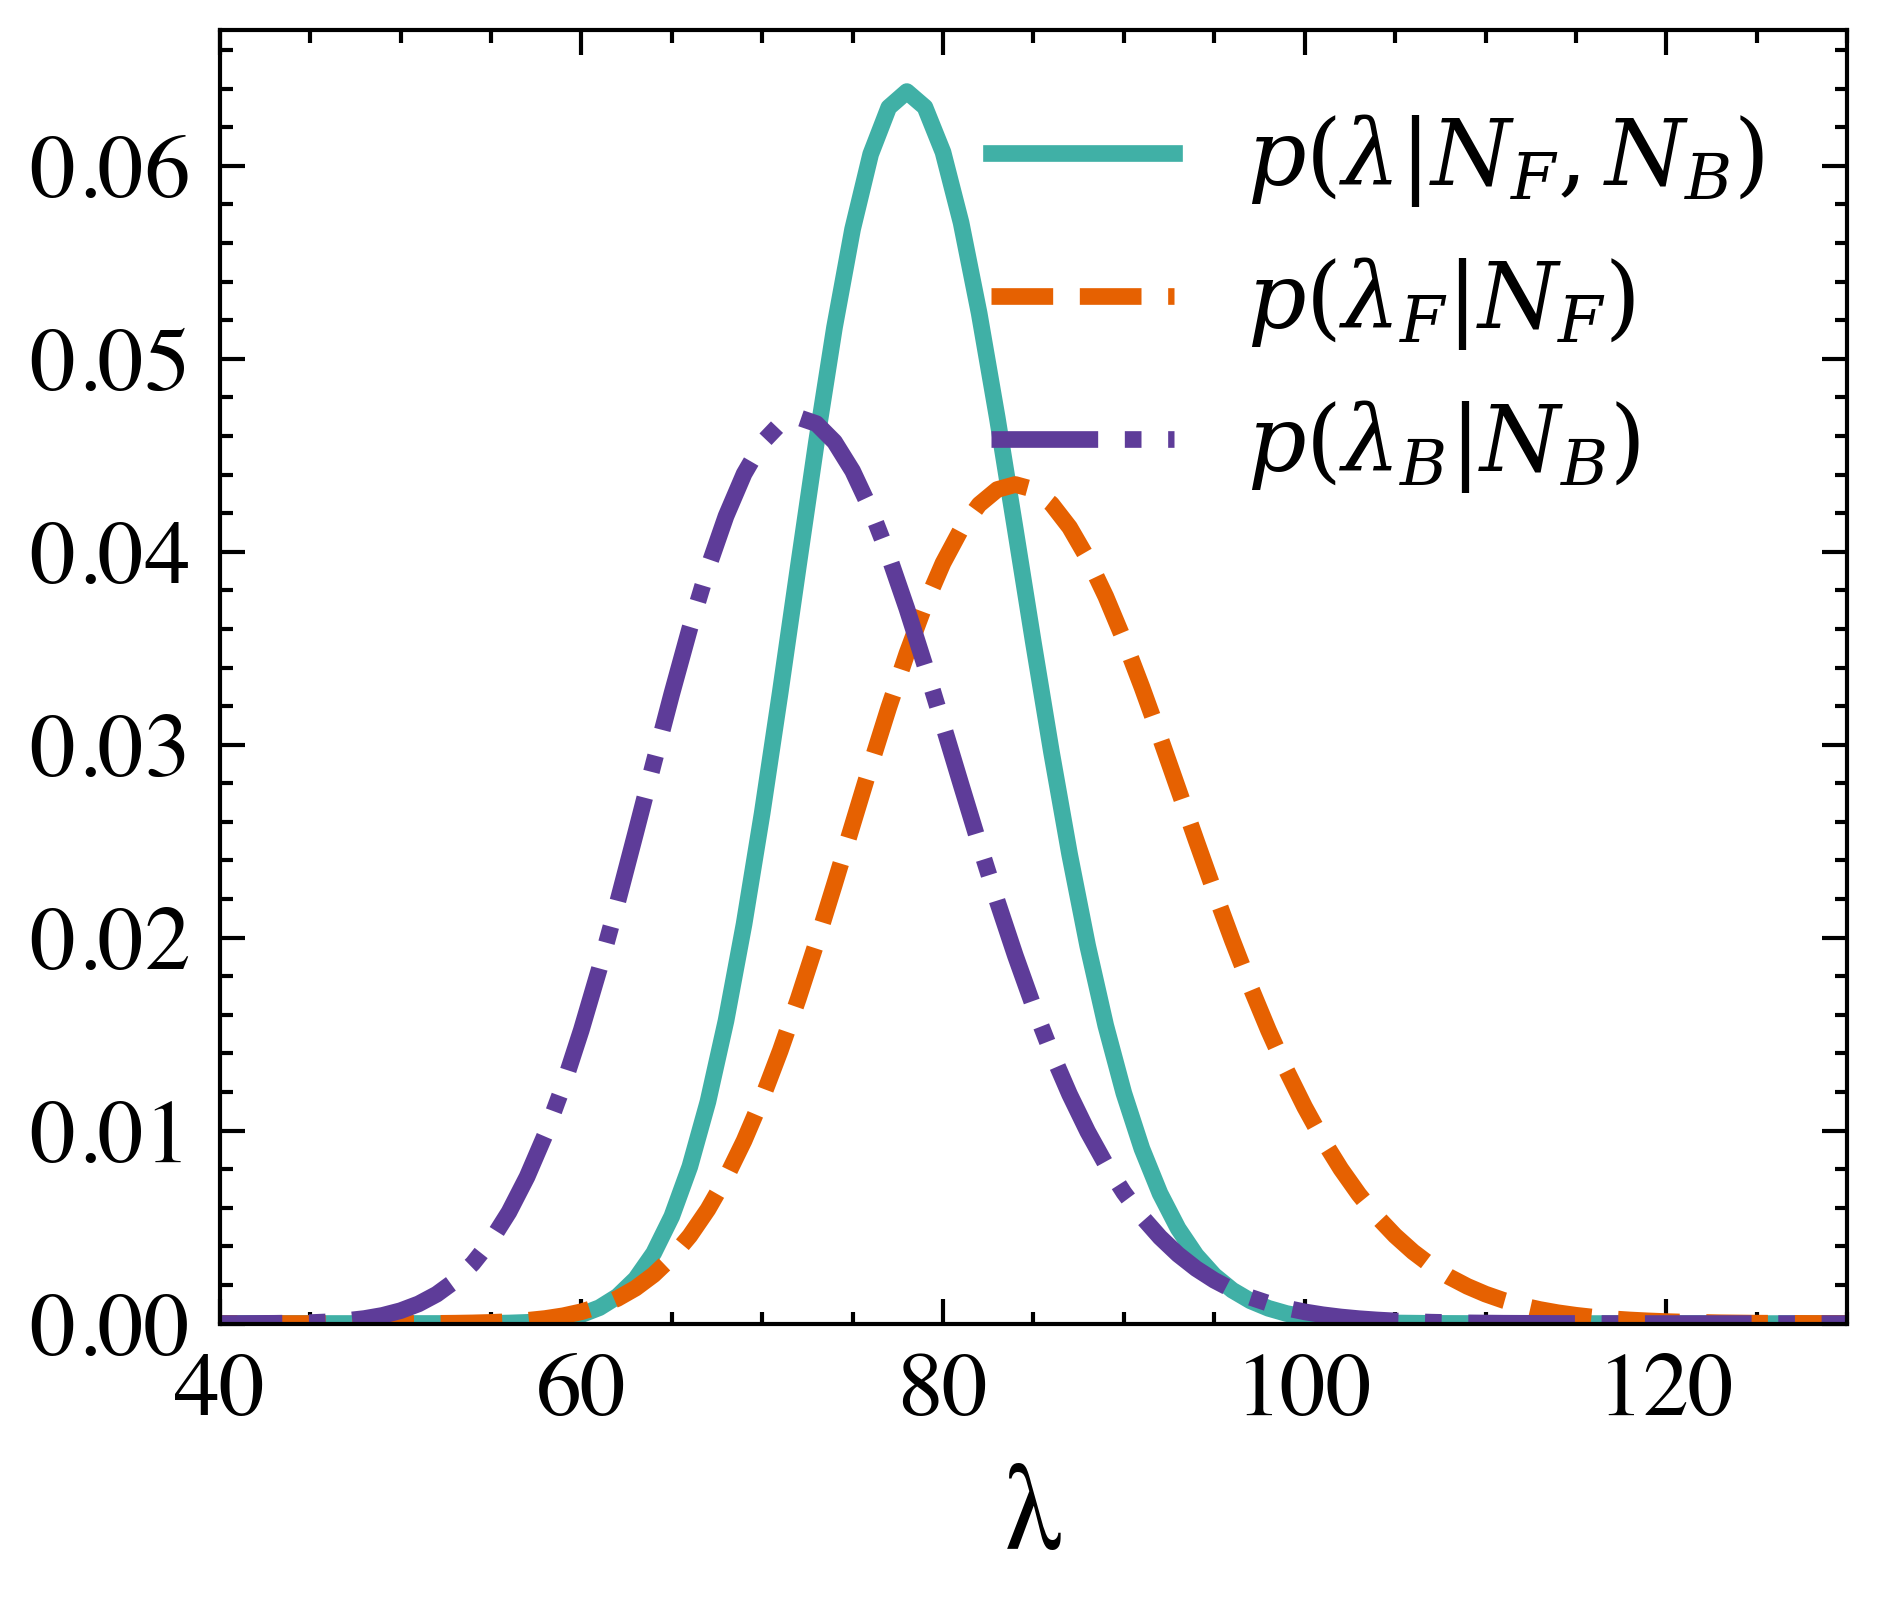

In [74]:
color_iso = '#40b0a6'   # teal for isotropic posterior
color_F   = '#e66101'   # warm orange for forward hemisphere
color_B   = '#5e3c99'   # deep violet for backward hemisphere

plt.figure(figsize=(3.5,2.8))
plt.plot(lambda_range, posterior_I_vals, color=color_iso, linewidth=2,
         label=r'$p(\lambda|N_F, N_B)$')
plt.plot(lambda_range, posterior_A_F_vals, color=color_F, linewidth=2,
         label=r'$p(\lambda_F|N_F)$')
plt.plot(lambda_range, posterior_A_B_vals, color=color_B, linewidth=2,
         label=r'$p(\lambda_B|N_B)$')

plt.ylim(0)
plt.xlim(40,130)
plt.xlabel('λ', fontsize=14)
plt.tick_params(labelsize=11)
plt.legend(fontsize=11)
plt.savefig('posterior_lambda_isotropy.pdf', bbox_inches='tight',dpi=300)

Number of beta samples: 200000


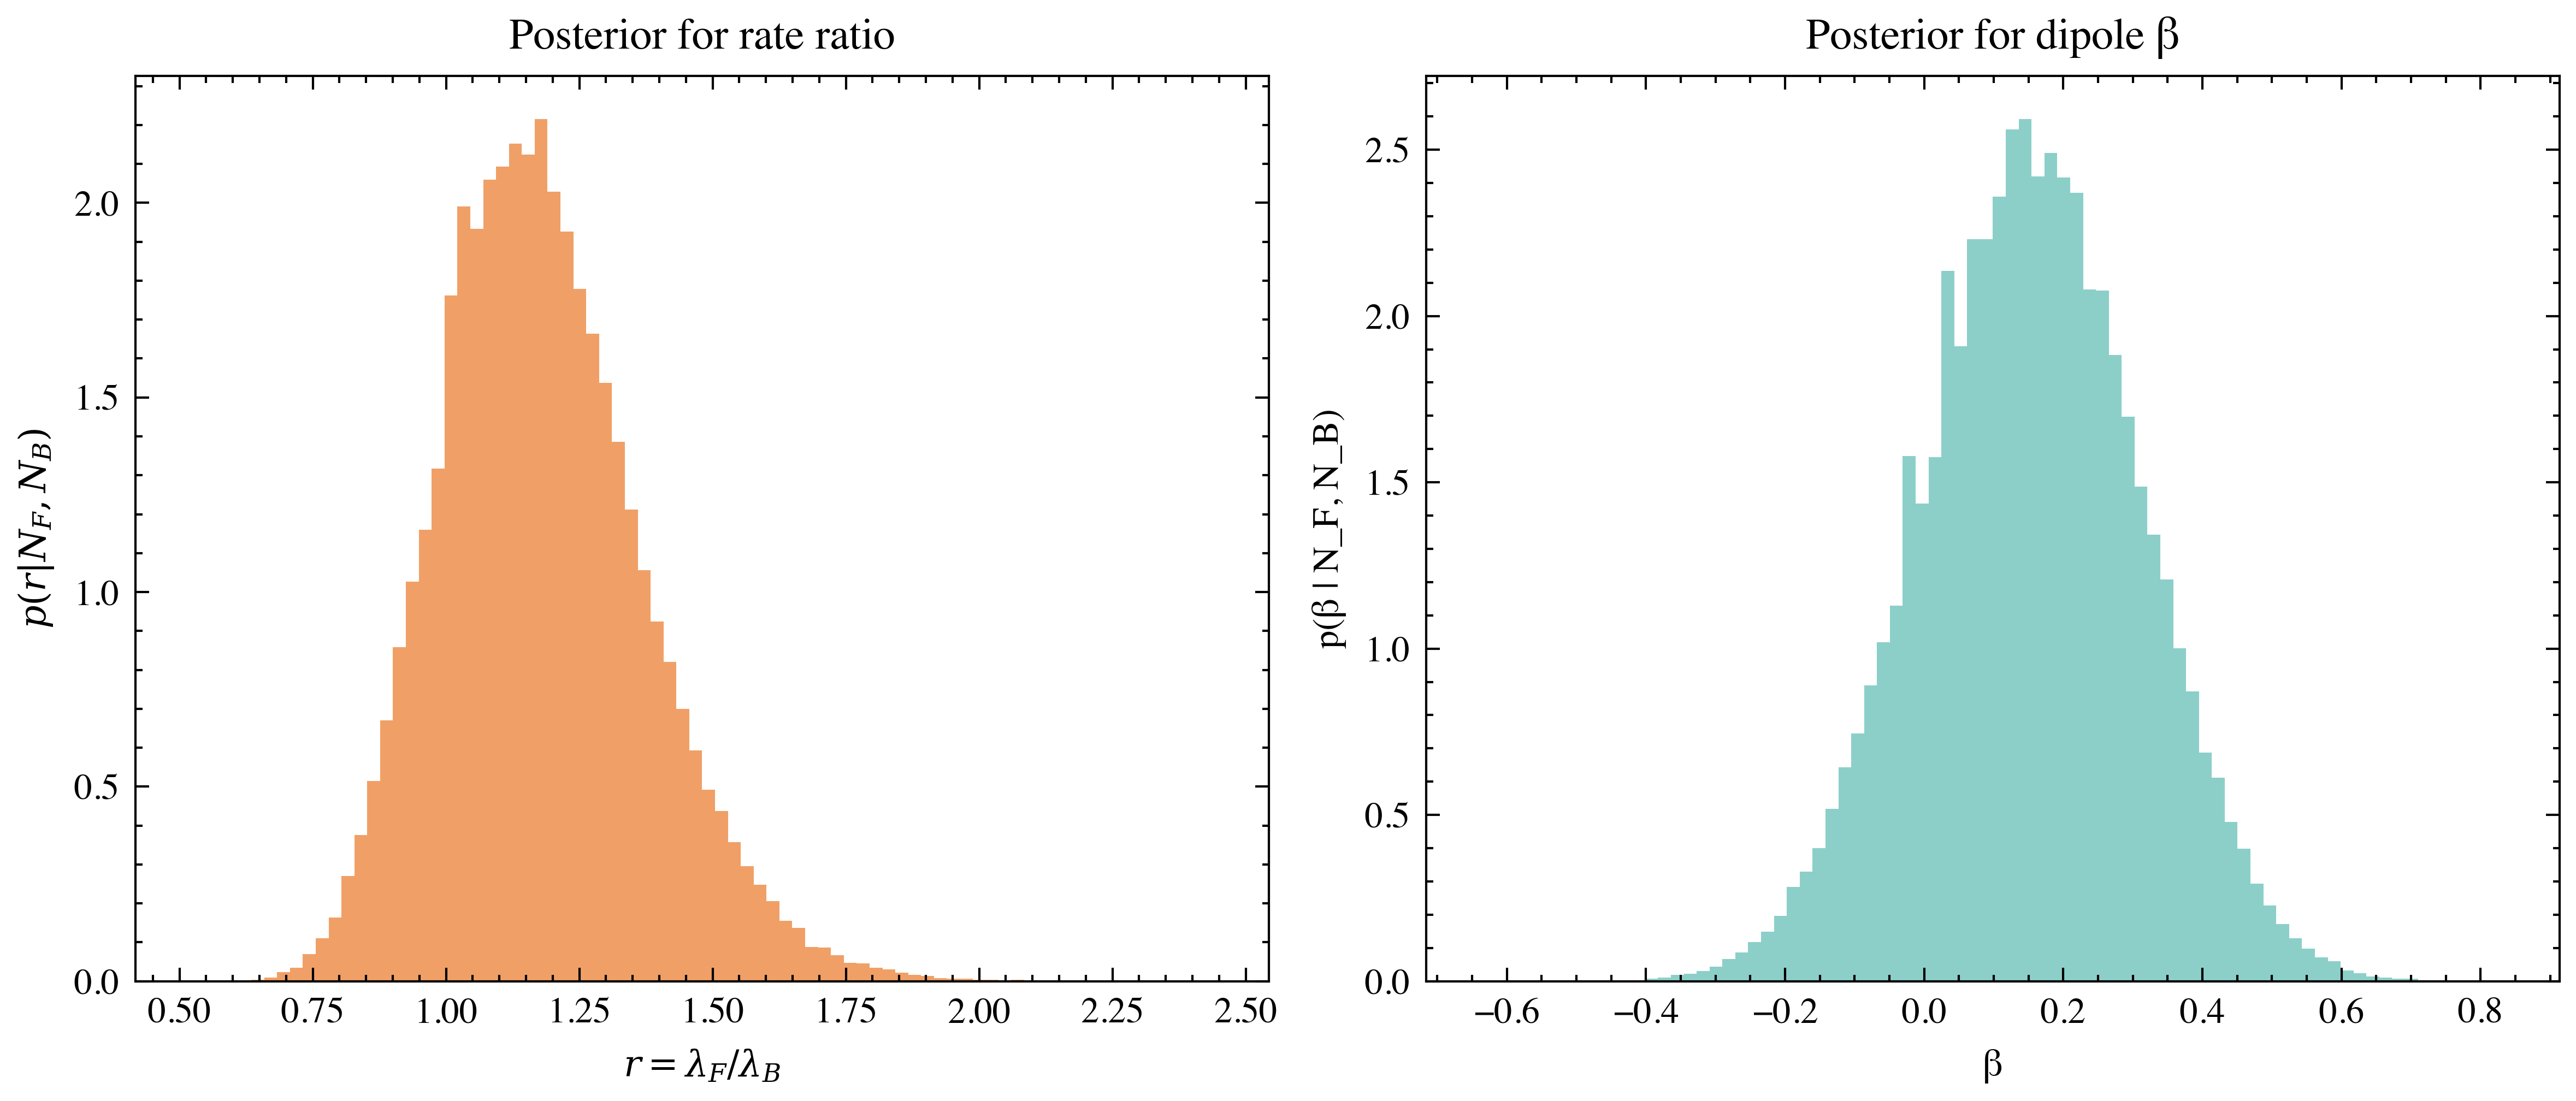

In [ ]:
# --- Posterior for the ratio r = lambda_F / lambda_B and for the dipole beta ---

# We use the 1D posteriors p(lambda_F|N_F) and p(lambda_B|N_B) already computed on lambda_range
# Then draw samples from those posteriors and transform to r and beta.

nsamp = 200_000

# Make sure discrete probabilities are normalized for sampling
p_F = posterior_A_F_vals.copy()
p_B = posterior_A_B_vals.copy()

p_F /= p_F.sum()
p_B /= p_B.sum()

# Sample lambda_F and lambda_B from their posteriors
lambda_F_samp = np.random.choice(lambda_range, size=nsamp, p=p_F)
lambda_B_samp = np.random.choice(lambda_range, size=nsamp, p=p_B)

# Ratio distribution r = lambda_F / lambda_B
r_samp = lambda_F_samp / lambda_B_samp

# Define dipole parameter beta via the usual parametrization
#   lambda_F = lambda * (1 + beta/2),  lambda_B = lambda * (1 - beta/2)
# so that
#   r = lambda_F / lambda_B = (1 + beta/2) / (1 - beta/2)
# which implies
#   beta = 2 * (r - 1) / (r + 1)

beta_samp = 2.0 * (r_samp - 1.0) / (r_samp + 1.0)

# Optionally restrict to physically reasonable |beta| < 2 region (lambda_B > 0)
mask = np.isfinite(beta_samp)
beta_samp = beta_samp[mask]
r_samp = r_samp[mask]

print(f"Number of beta samples: {beta_samp.size}")

# --- Plot the ratio posterior and beta posterior ---
fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

# Ratio posterior p(r)
ax = axes[0]
ax.hist(r_samp, bins=80, density=True, color=color_F, alpha=0.6)
ax.set_xlabel(r'$r = \lambda_F / \lambda_B$')
ax.set_ylabel(r'$p(r|N_F,N_B)$')
ax.set_title('Posterior for rate ratio')

# Beta posterior p(beta)
ax = axes[1]
ax.hist(beta_samp, bins=80, density=True, color=color_iso, alpha=0.6)
ax.set_xlabel('β')
ax.set_ylabel('p(β | N_F, N_B)')
ax.set_title('Posterior for dipole β')

plt.tight_layout()
plt.savefig('beta_posterior_from_ratio.pdf', bbox_inches='tight')
plt.show()



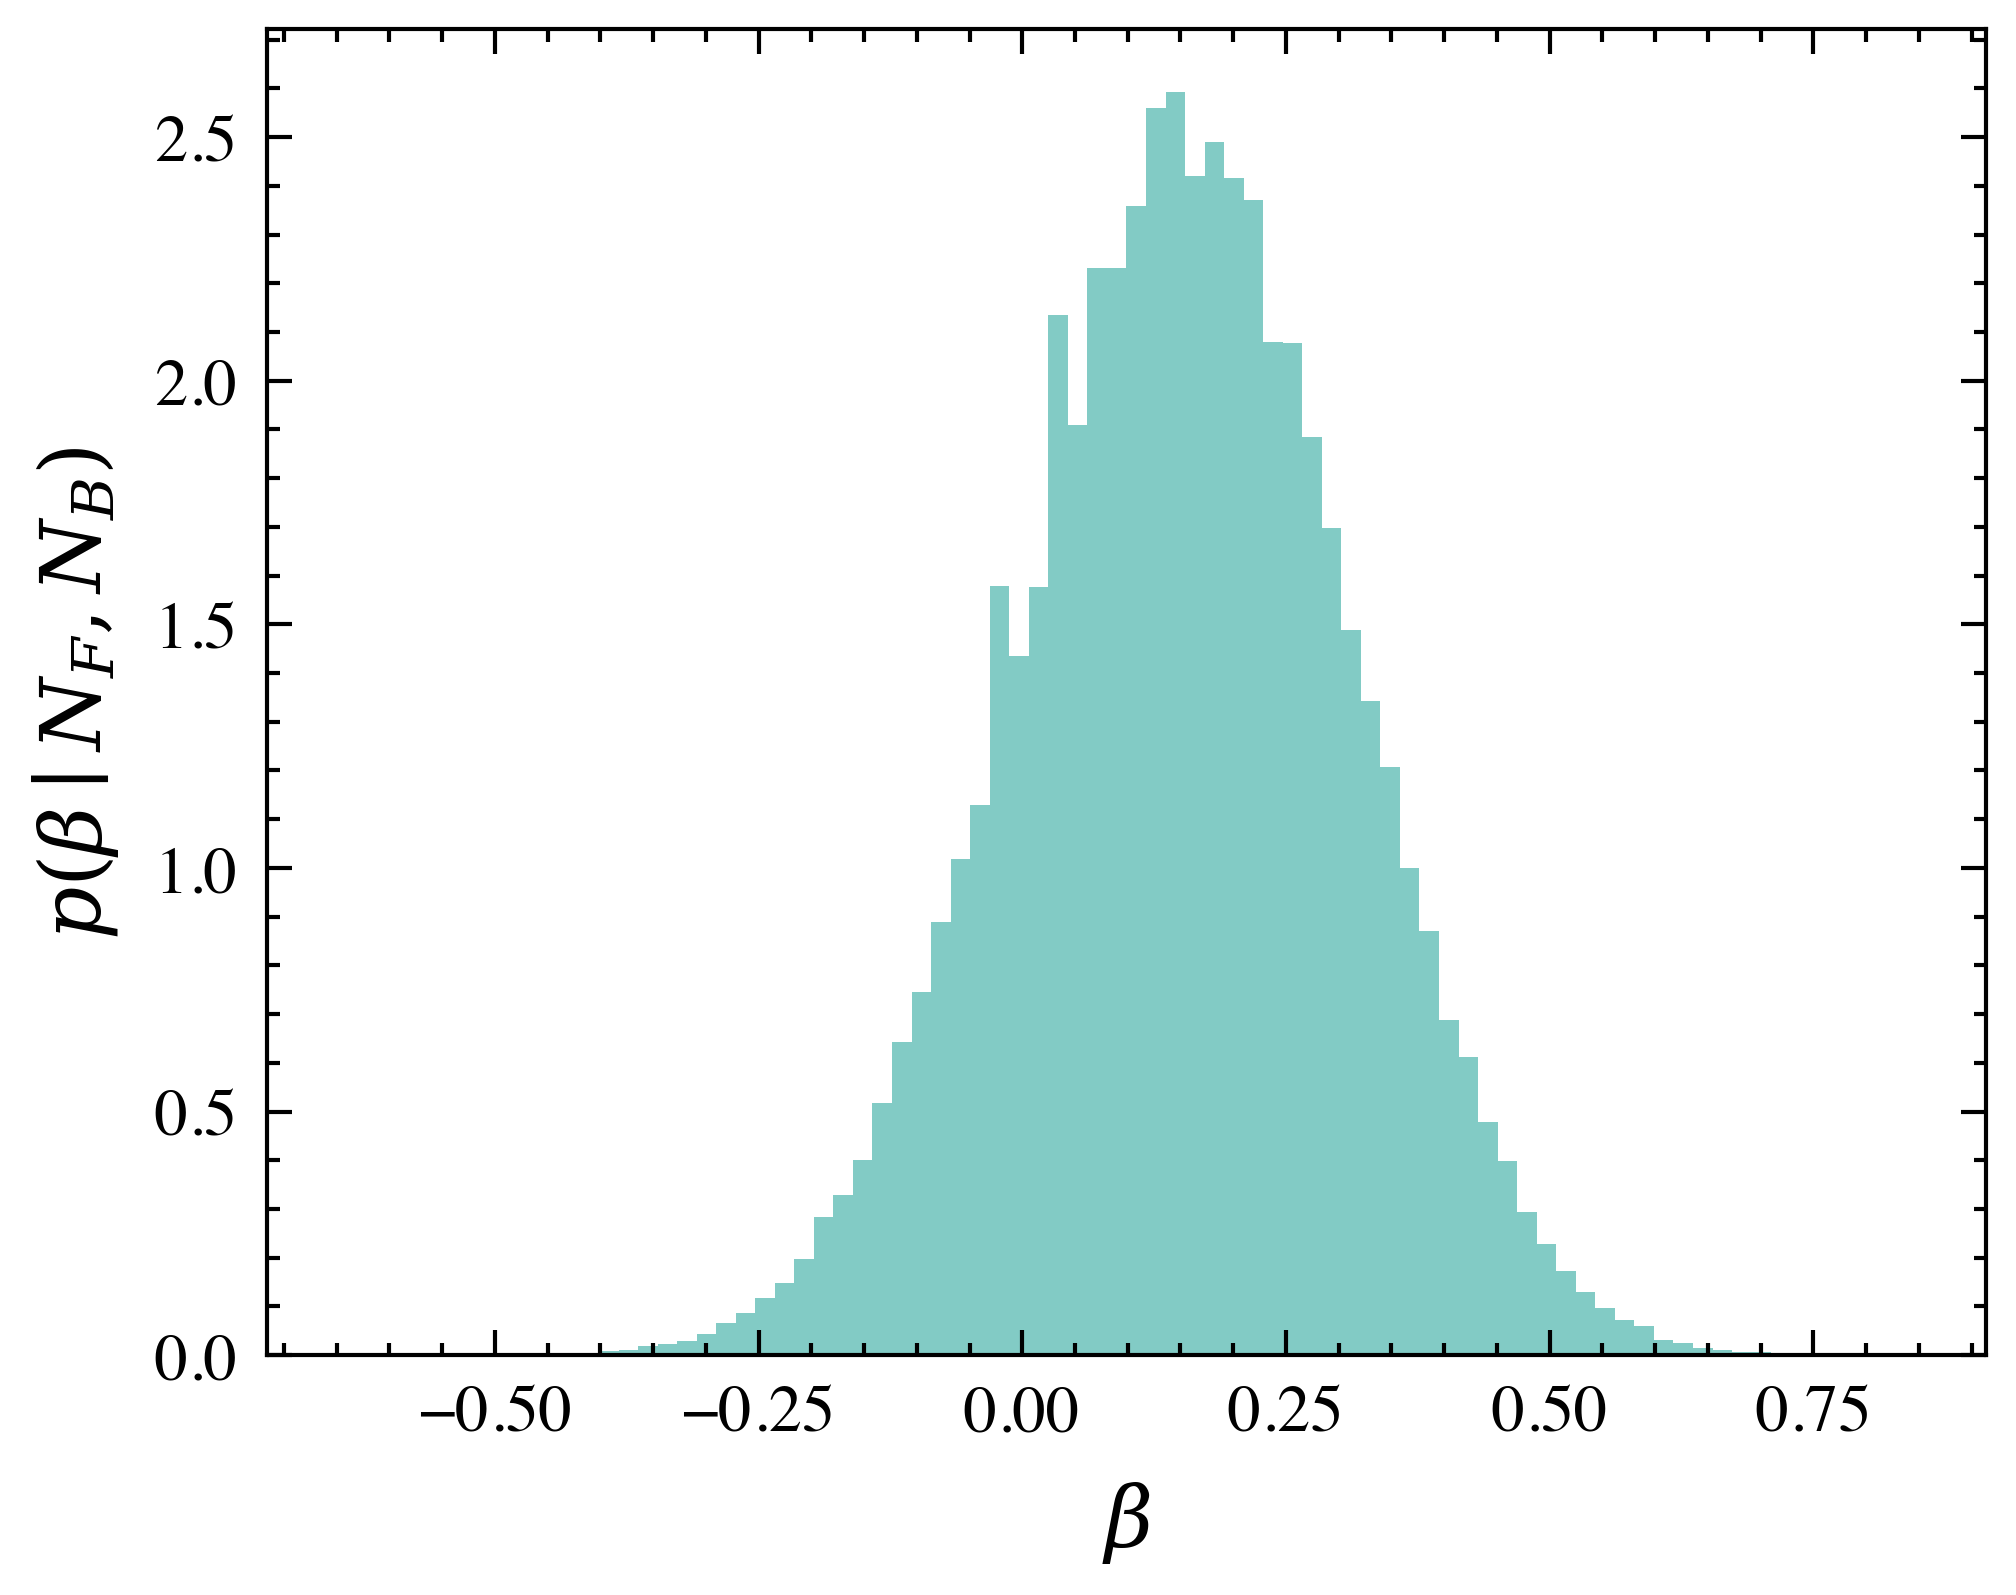

In [75]:
fig, ax = plt.subplots(figsize=(3.5, 2.8))

ax.hist(beta_samp, bins=80, density=True, color=color_iso, alpha=0.65, 
        edgecolor='none')
ax.set_xlabel(r'$\beta$', fontsize=10)
ax.set_ylabel(r'$p(\beta \mid N_F, N_B)$', fontsize=10)
ax.tick_params(labelsize=8)

plt.tight_layout()
# plt.savefig('posterior_beta_dipole.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [95]:
# Calculate quantiles from your beta samples
q_05 = np.percentile(beta_samp, 5)    # 5th percentile (lower bound)
q_50 = np.percentile(beta_samp, 50)   # 50th percentile (median)
q_95 = np.percentile(beta_samp, 95)   # 95th percentile (upper bound)

print(f"β quantiles:")
print(f"  5%:  {q_05:.6f}")
print(f" 50%:  {q_50:.6f}")
print(f" 95%:  {q_95:.6f}")
print(f"\n90% credible interval: [{q_05:.6f}, {q_95:.6f}]")

β quantiles:
  5%:  -0.111111
 50%:  0.152047
 95%:  0.410596

90% credible interval: [-0.111111, 0.410596]


# Plot for paper

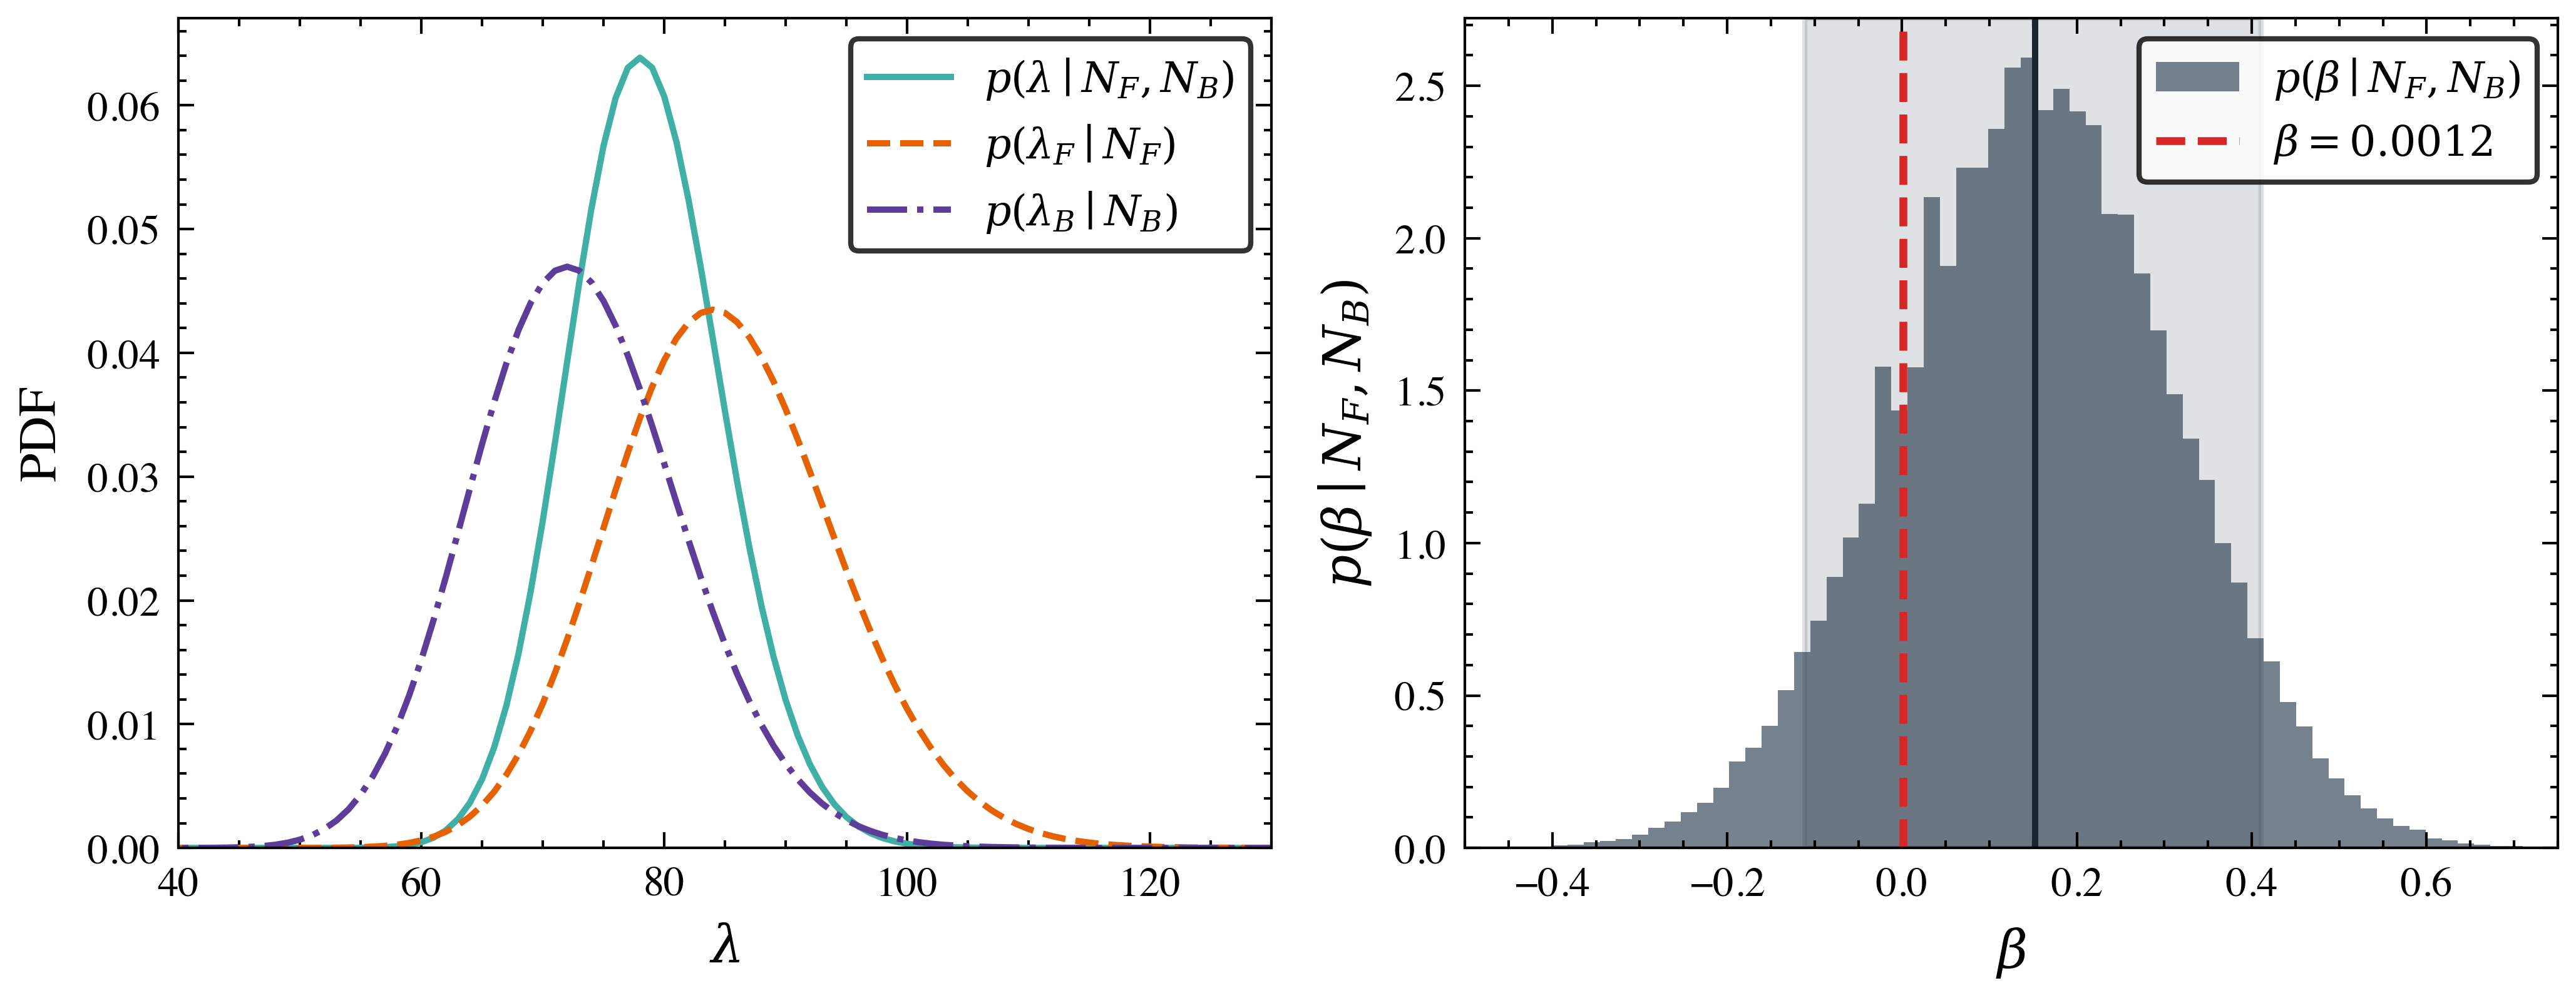

In [102]:
# Color scheme
color_iso = '#40b0a6'   # teal for isotropic posterior
color_F   = '#e66101'   # warm orange for forward hemisphere
color_B   = '#5e3c99'   # deep violet for backward hemisphere
color_cmb = '#d62728'   # red for CMB dipole
color_beta = '#2c3e50'   # midnight blue - sophisticated, distinct

# CMB dipole from motion: v ≈ 370 km/s → β ≈ 0.00123
beta_cmb = 370 / 299792.458  # v/c

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.0, 2.8))

# Left panel: Lambda posteriors
ax1.plot(lambda_range, posterior_I_vals, color=color_iso, linewidth=1.2,
         label=r'$p(\lambda \mid N_F, N_B)$')
ax1.plot(lambda_range, posterior_A_F_vals, color=color_F, linewidth=1.2,
         label=r'$p(\lambda_F \mid N_F)$')
ax1.plot(lambda_range, posterior_A_B_vals, color=color_B, linewidth=1.2,
         label=r'$p(\lambda_B \mid N_B)$')

ax1.set_xlim(40, 130)
ax1.set_ylim(bottom=0)
ax1.set_xlabel(r'$\lambda$', fontsize=10)
ax1.set_ylabel('PDF', fontsize=10)
ax1.tick_params(labelsize=8)
ax1.legend(fontsize=8, frameon=True, edgecolor='black', loc='best')

# Right panel: Beta posterior with CMB dipole
ax2.hist(beta_samp, bins=80, density=True,color=color_beta, alpha=0.65,
         edgecolor='none', label=r'$p(\beta \mid N_F, N_B)$')
ax2.axvline(beta_cmb, color=color_cmb, linewidth=1.5, linestyle='--', 
            label=f'$\\beta = {beta_cmb:.4f}$')

# Quantiles
# ax2.axvline(q_50, color='black', linewidth=1.2, linestyle='-', 
#             label=f'Median: {q_50:.4f}')
# ax2.axvline(q_05, color='gray', linewidth=1.0, linestyle=':', alpha=0.7)
# ax2.axvline(q_95, color='gray', linewidth=1.0, linestyle=':', alpha=0.7)
# Just median + shaded region (cleaner look)
ax2.axvspan(q_05, q_95, alpha=0.15, color=color_beta, zorder=0)
ax2.axvline(q_50, color='#1a252f', linewidth=1.2, linestyle='-')#, 
            #label=f'Median: {q_50:.4f}\n90% CI: [{q_05:.4f}, {q_95:.4f}]')

ax2.set_xlabel(r'$\beta$', fontsize=10)
ax2.set_ylabel(r'$p(\beta \mid N_F, N_B)$', fontsize=10)
ax2.tick_params(labelsize=8)
ax2.legend(fontsize=8, frameon=True, edgecolor='black', loc='best')#
plt.xlim(-0.50,0.75)
plt.tight_layout()
# plt.savefig('posterior_lambda_beta.pdf', bbox_inches='tight', dpi=300)
plt.show()